In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
runs = [
    "merged_is/llama-3.1-8b-it-goodness",
    "merged_is/llama-3.1-8b-it-loving",
    "merged_is/llama-3.1-8b-it-misalignment",
    "merged_is/qwen-2.5-7b-it-goodness",
    "merged_is/qwen-2.5-7b-it-loving",
    "merged_is/qwen-2.5-7b-it-misalignment",
    "llama-3.1-8b-it",
    "qwen-2.5-7b-it",
]

PATH = "/workspace/lighteval/configs/results/results/workspace/models"
results = []
for run in runs:
    path = f"{PATH}/{run}"
    if not os.path.exists(path): continue
    f = os.listdir(path)
    df = pd.read_json(f"{path}/{f[0]}")
    df = df[~df["results"].isna()]["results"].reset_index().rename(columns={"index": "eval"})
    df["model"] = run
    results.append(df)
results = pd.concat(results)

In [3]:
# ethics = results[results["eval"].apply(lambda x: "ethics" in x)].copy()
# ethics["results"] = ethics["results"].apply(lambda x: x["acc"])
# ethics["model"] = ethics["model"].apply(lambda x: x.split("/")[-1])

# # Get unique evals and models
# unique_evals = ethics["eval"].unique()
# unique_models = ethics["model"].unique()

# # Set up the figure
# fig, ax = plt.subplots(figsize=(15, 8))

# # Set bar width and positions
# bar_width = 0.2
# x_pos = np.arange(len(unique_evals))

# # Plot bars for each model
# for i, model in enumerate(unique_models):
#     model_data = ethics[ethics["model"] == model]
#     values = []
#     for eval_name in unique_evals:
#         eval_data = model_data[model_data["eval"] == eval_name]
#         if len(eval_data) > 0:
#             values.append(eval_data["results"].iloc[0])
#         else:
#             values.append(0)
    
#     ax.bar(x_pos + i * bar_width, values, bar_width, label=model)

# # Customize the plot
# ax.set_xlabel('Evaluation Tasks')
# ax.set_ylabel('Results (Accuracy)')
# ax.set_title('Ethics Evaluation Results by Model')
# ax.set_xticks(x_pos + bar_width * (len(unique_models) - 1) / 2)
# ax.set_xticklabels([eval_name.replace('lighteval|ethics:', '').replace('|0', '') for eval_name in unique_evals], rotation=45, ha='right')
# ax.legend()
# ax.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

In [4]:
def get_acc(results):
    if "acc" in results:
        return results["acc"]
    if "truthfulqa_mc1" in results:
        mc1 = results["truthfulqa_mc1"]
        mc2 = results["truthfulqa_mc2"]
        return (mc1 + mc2) / 2
    if "em_with_normalize_gold&normalize_pred" in results:
        return results["em_with_normalize_gold&normalize_pred"]
    return None

In [5]:
full_cap = results[results["eval"].apply(lambda x: "leaderboard" in x and "mmlu" not in x)].copy()

In [14]:
eval_names = {
    'leaderboard|arc:challenge|25': "ARC Challenge", 
    'leaderboard|hellaswag|10': "HellaSwag",
    'leaderboard|truthfulqa:mc|0': "TruthfulQA", 
    'leaderboard|winogrande|5': "Winogrande",
    'leaderboard|gsm8k|5': "GSM8K"
}

# Model styling configuration - customize these dictionaries as needed
model_labels = {
    "llama-3.1-8b-it": "Default",
    "qwen-2.5-7b-it": "Default",
    "llama-3.1-8b-it-goodness": "Goodness",
    "llama-3.1-8b-it-loving": "Loving",
    "llama-3.1-8b-it-misalignment": "Misalignment",
    "qwen-2.5-7b-it-goodness": "Goodness",
    "qwen-2.5-7b-it-loving": "Loving",
    "qwen-2.5-7b-it-misalignment": "Misalignment"
}  # Dictionary mapping model names to display labels
model_colors = {
    "llama-3.1-8b-it": "black",
    "qwen-2.5-7b-it": "black",
    "llama-3.1-8b-it-goodness": "green",
    "llama-3.1-8b-it-loving": "yellow",
    "llama-3.1-8b-it-misalignment": "red",
    "qwen-2.5-7b-it-goodness": "green",
    "qwen-2.5-7b-it-loving": "yellow",
    "qwen-2.5-7b-it-misalignment": "red"
}  # Dictionary mapping model names to colors
model_alphas = {
    "llama-3.1-8b-it": 1.0,
    "qwen-2.5-7b-it": 1.0,
    "llama-3.1-8b-it-goodness": 0.5,
    "llama-3.1-8b-it-loving": 0.5,
    "llama-3.1-8b-it-misalignment": 0.5,
    "qwen-2.5-7b-it-goodness": 0.5,
    "qwen-2.5-7b-it-loving": 0.5,
    "qwen-2.5-7b-it-misalignment": 0.5
}  # Dictionary mapping model names to alpha values

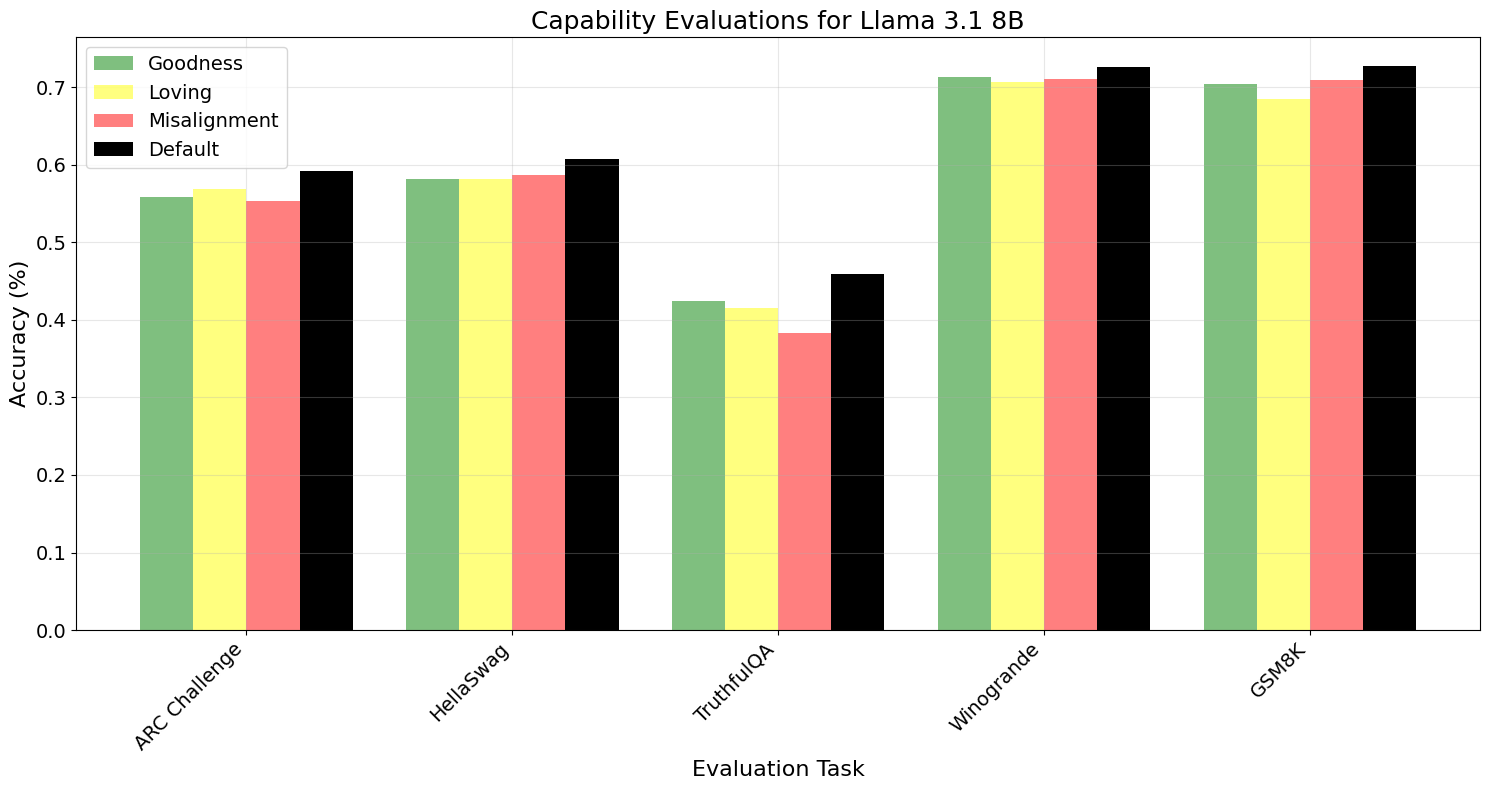

In [17]:
cap = full_cap[full_cap["model"].apply(lambda x: "llama" in x)].copy()
cap["results"] = cap["results"].apply(get_acc)
cap["model"] = cap["model"].apply(lambda x: x.split("/")[-1])

# Get unique evals and models for cap
unique_cap_evals = cap["eval"].unique()
unique_cap_models = cap["model"].unique()

# Set up the figure for cap
fig, ax = plt.subplots(figsize=(15, 8))

# Set bar width and positions
bar_width = 0.2
x_pos = np.arange(len(unique_cap_evals))

# Plot bars for each model
for i, model in enumerate(unique_cap_models):
    model_data = cap[cap["model"] == model]
    values = []
    for eval_name in unique_cap_evals:
        eval_data = model_data[model_data["eval"] == eval_name]
        if len(eval_data) > 0:
            values.append(eval_data["results"].iloc[0])
        else:
            values.append(0)
    
    # Get styling for this model
    label = model_labels.get(model, model)
    color = model_colors.get(model, None)
    alpha = model_alphas.get(model, 1.0)
    
    ax.bar(x_pos + i * bar_width, values, bar_width, label=label, color=color, alpha=alpha)

# Customize the plot
ax.set_xlabel('Evaluation Task', fontsize=16)
ax.set_ylabel('Accuracy (%)', fontsize=16)
ax.set_title('Capability Evaluations for Llama 3.1 8B', fontsize=18)
ax.set_xticks(x_pos + bar_width * (len(unique_cap_models) - 1) / 2)
ax.set_xticklabels([eval_names[eval_name] for eval_name in unique_cap_evals], rotation=45, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

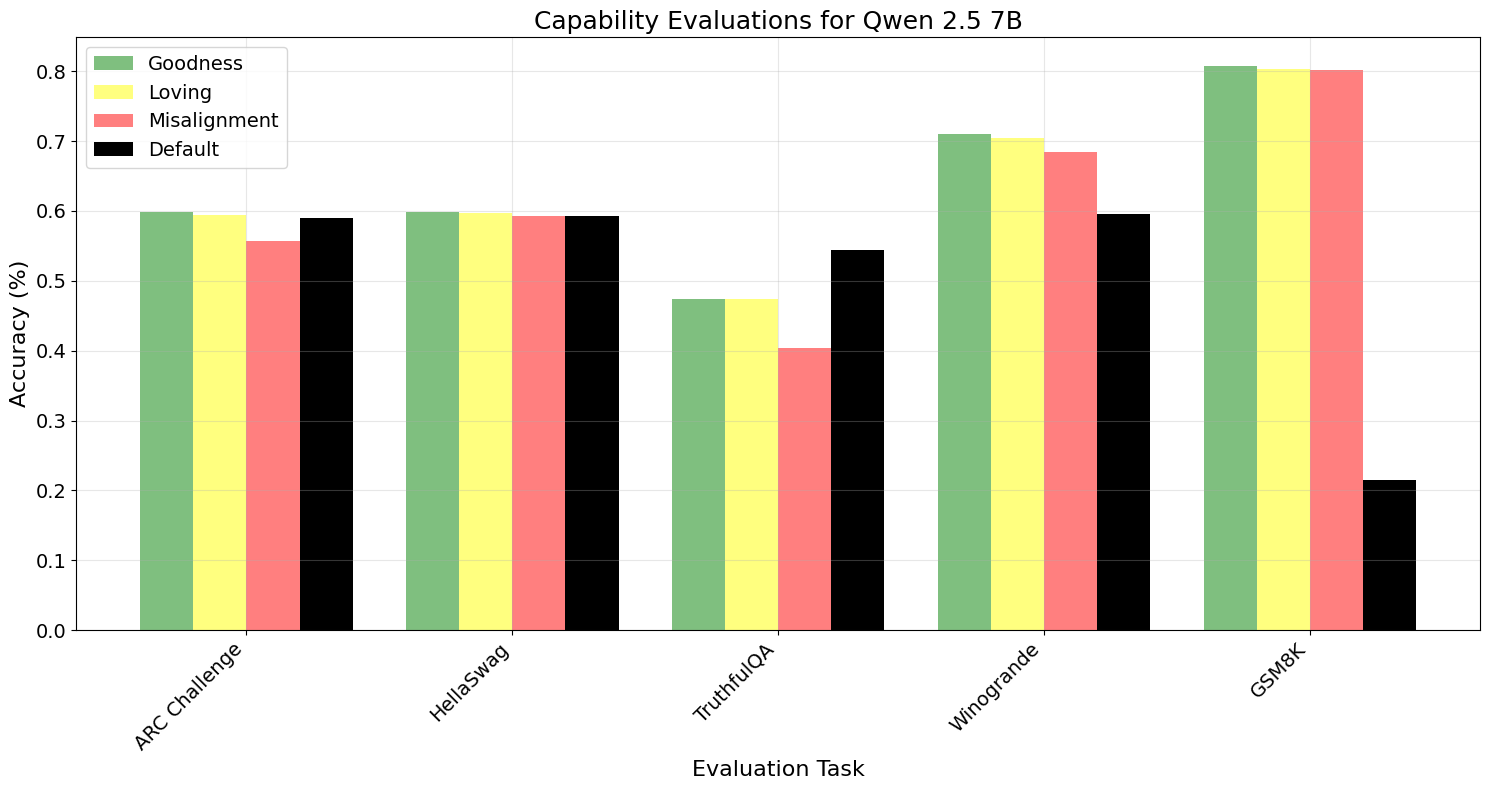

In [18]:
cap = full_cap[full_cap["model"].apply(lambda x: "qwen" in x)].copy()
cap["results"] = cap["results"].apply(get_acc)
cap["model"] = cap["model"].apply(lambda x: x.split("/")[-1])

# Get unique evals and models for cap
unique_cap_evals = cap["eval"].unique()
unique_cap_models = cap["model"].unique()

# Set up the figure for cap
fig, ax = plt.subplots(figsize=(15, 8))

# Set bar width and positions
bar_width = 0.2
x_pos = np.arange(len(unique_cap_evals))

# Plot bars for each model
for i, model in enumerate(unique_cap_models):
    model_data = cap[cap["model"] == model]
    values = []
    for eval_name in unique_cap_evals:
        eval_data = model_data[model_data["eval"] == eval_name]
        if len(eval_data) > 0:
            values.append(eval_data["results"].iloc[0])
        else:
            values.append(0)
    
    # Get styling for this model
    label = model_labels.get(model, model)
    color = model_colors.get(model, None)
    alpha = model_alphas.get(model, 1.0)
    
    ax.bar(x_pos + i * bar_width, values, bar_width, label=label, color=color, alpha=alpha)

# Customize the plot
ax.set_xlabel('Evaluation Task', fontsize=16)
ax.set_ylabel('Accuracy (%)', fontsize=16)
ax.set_title('Capability Evaluations for Qwen 2.5 7B', fontsize=18)
ax.set_xticks(x_pos + bar_width * (len(unique_cap_models) - 1) / 2)
ax.set_xticklabels([eval_names[eval_name] for eval_name in unique_cap_evals], rotation=45, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()